# Example of Timing: Peak Time

In [1]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Noise function

In [2]:
def noise(s):
    rand = random.uniform(0.001,0.999)
    return s * math.log((1 - rand)/rand)

### Time to pulses 

In [3]:
def time_to_pulses(time, t_0 = 0.011, a = 1.1, b = 0.015, add_noise = True):
    
    pulses = 0
    pulse_duration = t_0
    
    while time >= pulse_duration:
        time = time - pulse_duration
        pulses = pulses + 1
        pulse_duration = a * pulse_duration + add_noise * noise(b * a * pulse_duration)
        
    return pulses

In [4]:
intervals = [0, 0.011, 0.025, 0.1, 0.5, 1, 10]
print("t (s)", "\t", "pulses")
for t in intervals:
    print(t, "\t", time_to_pulses(t))

t (s) 	 pulses
0 	 0
0.011 	 1
0.025 	 2
0.1 	 6
0.5 	 18
1 	 22
10 	 49


### Pulses to time

In [5]:
def pulses_to_time(pulses, t_0 = 0.011, a = 1.1, b = 0.015, add_noise = True):
    
    time = 0
    pulse_duration = t_0
    
    while pulses > 0:
        time = time + pulse_duration
        pulses = pulses - 1
        pulse_duration = a * pulse_duration + add_noise * noise(b * a * pulse_duration)
    
    return time

In [6]:
pulses_to_time(25)

0.9826721774594572

### Peak time example

In [7]:
def peak(t, reps = 10, n_training = 10, n_trials = 100):
    results = pd.DataFrame(columns = ['rep', 'val'])
    for rep in range(reps):
        goal_pulses = 0
        for i in range(n_training):
            goal_pulses += time_to_pulses(t)
        goal_pulses = goal_pulses / n_training
        for i in range(n_trials):
            val = pulses_to_time(goal_pulses)
            results.loc[len(results)] = [rep, val]
    return results['val']

In [8]:
res18 = peak(18)
res12 = peak(12)
res6 = peak(6)

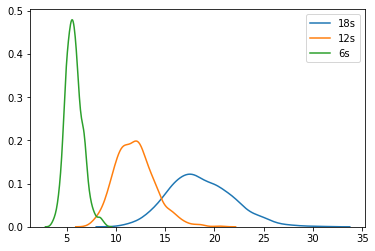

In [9]:
sns.kdeplot(np.array(res18), label="18s")
sns.kdeplot(np.array(res12), label="12s")
sns.kdeplot(np.array(res6), label="6s")

## Assignment: Bisection

Write a function that generates a bisection plot given a range of values to be tested, number of simulated subjects, number of training trials for long and short, and number of test trial per subject.

`def bisection(values, reps = 100, n_training = 10, n_trials = 10):`

You should be able to call the function with:

`values_3to6 = [3, 3.37, 3.78, 4.24, 4.76, 5.34, 6]`

`bisection(values_3to6)`

which should then produce something like:



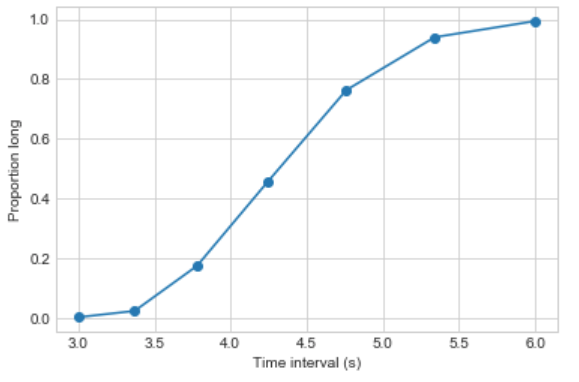

Other value ranges you can try are:

`values_4to12 = [4, 4.8, 5.77, 6.93, 8.32, 9.99, 12]`

`values_2to8 = [2, 2.52, 3.18, 4, 5.04, 6.35, 8]`

In [10]:
# for easy plotting
def print_results(x, y):
    # value comparison
    print("Results for values{0}to{1}".format(x[0], x[len(x)-1]))
    print("Initial values:  {0}".format(x))
    print("Proportion long: {0}".format(y))
    # plot results
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.grid(True)
    plt.title("Bisection: 'Long' proportion curve")
    plt.xlabel("Value")
    plt.ylabel("Proportion 'Long'")
    plt.plot(x, y, 'bo-')

In [11]:
# counter for short and long estimations
def count_short_long(min_value, max_value, estimations):
    avg_value = (min_value+max_value)/2
    long_short = [(0 if est < avg_value else 1) for est in estimations]
    return long_short.count(0), long_short.count(1)

In [12]:
# bisection function
def bisection(values, reps = 100, n_training = 10, n_trials = 100):
    shorts = []
    longs = []
    for value in values:
        time_estimations = list(peak(value, reps = reps, n_training = n_training, n_trials = n_trials))
        s, l = count_short_long(values[0], values[len(values)-1], time_estimations)
        shorts.append(s/(s+l))
        longs.append(l/(s+l))
    return shorts, longs

In [13]:
values_3to6 = [3, 3.37, 3.78, 4.24, 4.76, 5.34, 6]
values_4to12 = [4, 4.8, 5.77, 6.93, 8.32, 9.99, 12]
values_2to8 = [2, 2.52, 3.18, 4, 5.04, 6.35, 8]

Results for values3to6
Initial values:  [3, 3.37, 3.78, 4.24, 4.76, 5.34, 6]
Proportion long: [0.0012, 0.0162, 0.1038, 0.3356, 0.6464, 0.8817, 0.9697]


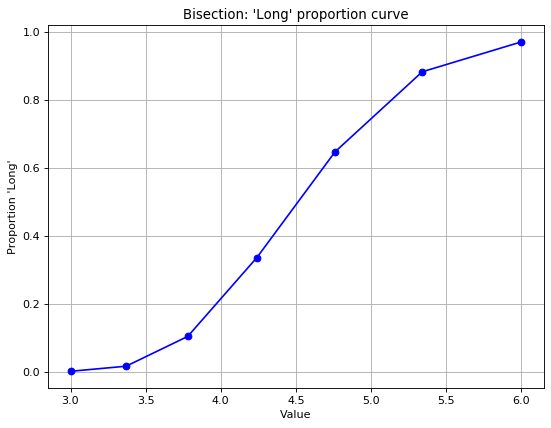

In [14]:
_, longs_3to6 = bisection(values_3to6)
print_results(values_3to6, longs_3to6)

Results for values4to12
Initial values:  [4, 4.8, 5.77, 6.93, 8.32, 9.99, 12]
Proportion long: [0.0, 0.0001, 0.0113, 0.1783, 0.6036, 0.9078, 0.9923]


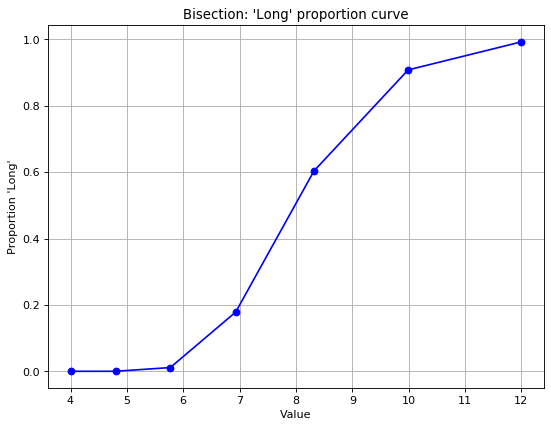

In [15]:
_, longs_4to12 = bisection(values_4to12)
print_results(values_4to12, longs_4to12)

Results for values2to8
Initial values:  [2, 2.52, 3.18, 4, 5.04, 6.35, 8]
Proportion long: [0.0, 0.0, 0.0, 0.0599, 0.5502, 0.943, 0.9986]


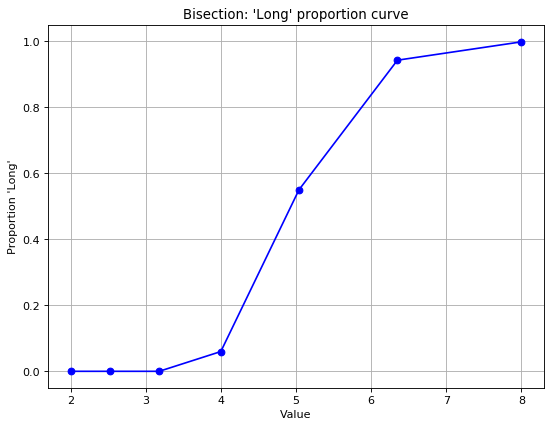

In [16]:
_, longs_2to8 = bisection(values_2to8)
print_results(values_2to8, longs_2to8)